### 데이터 불러오기

In [7]:
import pandas as pd

# 파일 경로 설정
train_path = 'C:/Users/82106/Desktop/제주도 과일 공모전/data/train.csv'
test_path = 'C:/Users/82106/Desktop\제주도 과일 공모전/data/test.csv'
trade_path = 'C:/Users/82106/Desktop\제주도 과일 공모전/data/international_trade.csv'
sample_submission_path = 'C:/Users/82106/Desktop\제주도 과일 공모전/data/sample_submission.csv'

# 데이터 불러오기
train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)
trade_data = pd.read_csv(trade_path)
sample_submission = pd.read_csv(sample_submission_path)

# 데이터의 첫 5행 확인
train_head = train_data.head()
test_head = test_data.head()
trade_head = trade_data.head()
sample_submission_head = sample_submission.head()

# 데이터의 기본 통계량 확인
train_description = train_data.describe()

# 데이터의 결측치 및 데이터 타입 확인
train_info = train_data.info()
train_missing_values = train_data.isnull().sum()

(train_head, test_head, trade_head, sample_submission_head, train_description, train_info, train_missing_values)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59397 entries, 0 to 59396
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           59397 non-null  object 
 1   timestamp    59397 non-null  object 
 2   item         59397 non-null  object 
 3   corporation  59397 non-null  object 
 4   location     59397 non-null  object 
 5   supply(kg)   59397 non-null  float64
 6   price(원/kg)  59397 non-null  float64
dtypes: float64(2), object(5)
memory usage: 3.2+ MB


(                ID   timestamp item corporation location  supply(kg)  \
 0  TG_A_J_20190101  2019-01-01   TG           A        J         0.0   
 1  TG_A_J_20190102  2019-01-02   TG           A        J         0.0   
 2  TG_A_J_20190103  2019-01-03   TG           A        J     60601.0   
 3  TG_A_J_20190104  2019-01-04   TG           A        J     25000.0   
 4  TG_A_J_20190105  2019-01-05   TG           A        J     32352.0   
 
    price(원/kg)  
 0          0.0  
 1          0.0  
 2       1728.0  
 3       1408.0  
 4       1250.0  ,
                 ID   timestamp item corporation location
 0  TG_A_J_20230304  2023-03-04   TG           A        J
 1  TG_A_J_20230305  2023-03-05   TG           A        J
 2  TG_A_J_20230306  2023-03-06   TG           A        J
 3  TG_A_J_20230307  2023-03-07   TG           A        J
 4  TG_A_J_20230308  2023-03-08   TG           A        J,
         기간                        품목명   수출 중량  수출 금액    수입 중량  수입 금액  무역수지
 0  2019-01  토마토(신선한 것이나 냉

### 상관관계 히트맵

C:\Users\82106\anaconda3\lib\site-packages\seaborn\utils.py:95: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.draw()
C:\Users\82106\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


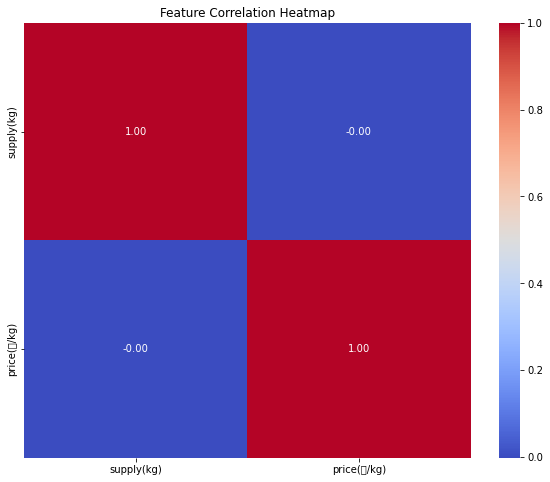

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# 타겟 변수 'price(원/kg)'와 다른 수치형 특성들 간의 상관관계 분석
correlation_matrix = train_data.corr()

# 상관관계 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


### 데이터 전처리, 스케일링

In [9]:
# 데이터 전처리 및 특성 엔지니어링을 위한 준비

# timestamp 컬럼을 datetime 객체로 변환
train_data['timestamp'] = pd.to_datetime(train_data['timestamp'])

# 연, 월, 일, 요일을 새로운 컬럼으로 추출
train_data['year'] = train_data['timestamp'].dt.year
train_data['month'] = train_data['timestamp'].dt.month
train_data['day'] = train_data['timestamp'].dt.day
train_data['dayofweek'] = train_data['timestamp'].dt.dayofweek

# 범주형 변수를 원-핫 인코딩
categorical_features = ['item', 'corporation', 'location']
train_data_encoded = pd.get_dummies(train_data, columns=categorical_features)

# 수치형 특성 스케일링
from sklearn.preprocessing import StandardScaler

# supply(kg) 특성을 표준화
scaler = StandardScaler()
train_data_encoded['supply(kg)_scaled'] = scaler.fit_transform(train_data_encoded[['supply(kg)']])

# 불필요한 컬럼 제거 (원본 supply(kg) 컬럼과 timestamp 컬럼)
train_data_final = train_data_encoded.drop(['supply(kg)', 'timestamp', 'ID'], axis=1)

# 처리된 데이터의 상위 5행을 확인
train_data_final.head()


,price(원/kg),year,month,day,dayofweek,item_BC,item_CB,item_CR,item_RD,item_TG,corporation_A,corporation_B,corporation_C,corporation_D,corporation_E,corporation_F,location_J,location_S,supply(kg)_scaled
0,0.0,2019,1,1,1,0,0,0,0,1,1,0,0,0,0,0,1,0,-0.227587
1,0.0,2019,1,2,2,0,0,0,0,1,1,0,0,0,0,0,1,0,-0.227587
2,1728.0,2019,1,3,3,0,0,0,0,1,1,0,0,0,0,0,1,0,0.931939
3,1408.0,2019,1,4,4,0,0,0,0,1,1,0,0,0,0,0,1,0,0.250757
4,1250.0,2019,1,5,5,0,0,0,0,1,1,0,0,0,0,0,1,0,0.391429


### 타겟변수 설정, 훈련데이터, 검증데이터 분할 , 학습 , 예측, 평가

In [10]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 타겟 변수와 특성 변수 분리
X = train_data_final.drop('price(원/kg)', axis=1)
y = train_data_final['price(원/kg)']

# 훈련 데이터와 검증 데이터 분할
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 회귀 모델 초기화 및 훈련
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 검증 데이터에 대한 예측 수행
y_pred = rf_model.predict(X_valid)

# 평균 제곱근 오차(RMSE) 계산
rmse = mean_squared_error(y_valid, y_pred, squared=False)

rmse


417.602195868801

### 하이퍼파라미터

In [11]:
# 하이퍼파라미터 설정
n_estimators = 150  # 트리의 수
max_depth = 20  # 트리의 최대 깊이
min_samples_split = 5  # 노드를 분할하기 위한 최소 샘플 수
min_samples_leaf = 2  # 리프 노드에 있어야 하는 최소 샘플 수

# 랜덤 포레스트 회귀 모델 생성 및 훈련
rf_model = RandomForestRegressor(n_estimators=n_estimators,
                                 max_depth=max_depth,
                                 min_samples_split=min_samples_split,
                                 min_samples_leaf=min_samples_leaf,
                                 random_state=42,
                                 n_jobs=-1)
rf_model.fit(X_train, y_train)

# 검증 데이터에 대한 예측 수행
y_pred = rf_model.predict(X_valid)

# 평균 제곱근 오차(RMSE) 계산
rmse = mean_squared_error(y_valid, y_pred, squared=False)

rmse

412.67118693467023

### 모델 평가

In [12]:
from sklearn.metrics import r2_score

# 검증 데이터에 대한 R^2 점수 계산
r2 = r2_score(y_valid, y_pred)
r2


0.9582692827739767

In [13]:
# test.csv 파일을 다시 로드하고 컬럼들을 확인합니다.
test_data = pd.read_csv('C:/Users/82106/Desktop/제주도 과일 공모전/data/test.csv')

# test 데이터의 컬럼 확인
test_data_columns = test_data.columns.tolist()

# supply(kg) 컬럼이 있는지 확인
'supply(kg)' in test_data_columns, test_data_columns


(False, ['ID', 'timestamp', 'item', 'corporation', 'location'])

In [21]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# train.csv 파일에서 'supply(kg)' 관련 특성을 제외하고 데이터를 다시 불러오기
train_data = pd.read_csv('C:/Users/82106/Desktop/제주도 과일 공모전/data/train.csv')

# 'timestamp' 컬럼을 datetime 객체로 변환하고 새로운 컬럼 추출
train_data['timestamp'] = pd.to_datetime(train_data['timestamp'])
train_data['year'] = train_data['timestamp'].dt.year
train_data['month'] = train_data['timestamp'].dt.month
train_data['day'] = train_data['timestamp'].dt.day
train_data['dayofweek'] = train_data['timestamp'].dt.dayofweek

# 범주형 변수 원-핫 인코딩
train_data = pd.get_dummies(train_data, columns=['item', 'corporation', 'location'])

# 불필요한 컬럼 제거
train_data.drop(['ID', 'timestamp', 'supply(kg)'], axis=1, inplace=True)

# 타겟 변수와 특성 변수 분리
X = train_data.drop('price(원/kg)', axis=1)
y = train_data['price(원/kg)']

# 훈련 데이터와 검증 데이터 분할
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 회귀 모델 생성 및 훈련
rf_model = RandomForestRegressor(n_estimators=150, max_depth=20, min_samples_split=5, min_samples_leaf=2, random_state=42, n_jobs=-1)
rf_model.fit(X_train, y_train)

# test.csv 파일에서 동일한 전처리를 수행하고 예측하기
test_data = pd.read_csv('C:/Users/82106/Desktop/제주도 과일 공모전/data/test.csv')
test_data['timestamp'] = pd.to_datetime(test_data['timestamp'])
test_data['year'] = test_data['timestamp'].dt.year
test_data['month'] = test_data['timestamp'].dt.month
test_data['day'] = test_data['timestamp'].dt.day
test_data['dayofweek'] = test_data['timestamp'].dt.dayofweek
test_data = pd.get_dummies(test_data, columns=['item', 'corporation', 'location'])

# test.csv 파일에는 'supply(kg)' 컬럼이 없으므로, 이 컬럼 없이 예측을 수행
# 훈련 데이터에 사용된 특성만 test 데이터에 적용
X_test = test_data[X_train.columns]

# 예측 수행
test_predictions = rf_model.predict(X_test)



In [22]:
from sklearn.metrics import r2_score

# 새로 훈련된 모델에 대한 검증 데이터의 R^2 점수 계산
r2_score_retrained = r2_score(y_valid, rf_model.predict(X_valid))
r2_score_retrained


0.8236255358735824

In [23]:
from sklearn.metrics import mean_squared_error
# 평균 제곱근 오차(RMSE) 계산
rmse = mean_squared_error(y_valid, rf_model.predict(X_valid), squared=False)

rmse

848.3871389478884

In [24]:
# sample_submission.csv 파일의 형식에 맞게 예측 결과 저장하기
sample_submission = pd.read_csv('C:/Users/82106/Desktop/제주도 과일 공모전/data/sample_submission.csv')
sample_submission['answer'] = test_predictions

# 예측 결과를 CSV 파일로 저장하기
submission_file_path = 'C:/Users/82106/Desktop/제주도 과일 공모전/data/final_submission.csv'
sample_submission.to_csv(submission_file_path, index=False)

submission_file_path

'C:/Users/82106/Desktop/제주도 과일 공모전/data/final_submission.csv'